In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
!pip install datasets transformers torch

In [31]:
# import diffusiondb dataset from HuggingFace poloclub/diffusiondb cifar10
from datasets import load_dataset

dataset_train = load_dataset(
    'poloclub/diffusiondb',
    split='train', # training dataset
    ignore_verifications=False  # set to True if seeing splits Error
)

dataset_train

Dataset({
    features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'],
    num_rows: 1000
})

In [33]:
from datasets import load_dataset

dataset_test = load_dataset
(
    'poloclub/diffusiondb',
    split:='test', # training dataset
    ignore_verifications:=True  # set to True if seeing splits Error
)

dataset_test

<function datasets.load.load_dataset(path: str, name: Optional[str] = None, data_dir: Optional[str] = None, data_files: Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]], NoneType] = None, split: Union[str, datasets.splits.Split, NoneType] = None, cache_dir: Optional[str] = None, features: Optional[datasets.features.features.Features] = None, download_config: Optional[datasets.utils.file_utils.DownloadConfig] = None, download_mode: Optional[datasets.utils.download_manager.DownloadMode] = None, ignore_verifications: bool = False, keep_in_memory: Optional[bool] = None, save_infos: bool = False, revision: Union[str, datasets.utils.version.Version, NoneType] = None, use_auth_token: Union[str, bool, NoneType] = None, task: Union[str, datasets.tasks.base.TaskTemplate, NoneType] = None, streaming: bool = False, **config_kwargs) -> Union[datasets.dataset_dict.DatasetDict, datasets.arrow_dataset.Dataset, datasets.dataset_dict.IterableDatasetDict, datasets.iterable_dataset.Iterab

In [34]:
# check how many prompts/number of classes
num_classes = len(set(dataset_train['prompt']))
prompt = dataset_train.features['prompt']
num_classes, prompt

(931, Value(dtype='string', id=None))

In [35]:
dataset_train[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'prompt': 'a film still from the girl on the train ( 2 0 1 6 ) ',
 'seed': 1050062014,
 'step': 50,
 'cfg': 7.0,
 'sampler': 'k_lms',
 'width': 512,
 'height': 512,
 'user_name': '68dc4fdc3801baf5965b99f3a632fa0770ed75cd46b4b298ec2419e16af461d4',
 'timestamp': datetime.datetime(2022, 8, 13, 3, 1, tzinfo=<UTC>),
 'image_nsfw': 0.6095967888832092,
 'prompt_nsfw': 0.0019161078380420804}

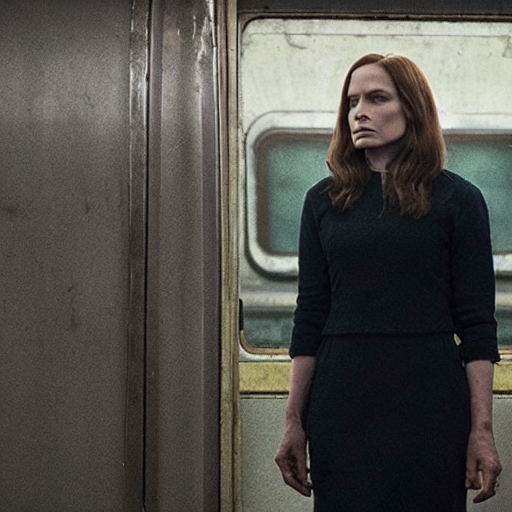

In [36]:
dataset_train[0]['image']

In [37]:
dataset_train[0]['prompt']

'a film still from the girl on the train ( 2 0 1 6 ) '

In [38]:
from transformers import ViTFeatureExtractor

# import model
model_id = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(
    model_id
)

/opt/conda/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [39]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [40]:
example = feature_extractor(
    dataset_train[0]['image'],
    return_tensors='pt'
)
example

{'pixel_values': tensor([[[[-0.5765, -0.5843, -0.6157,  ..., -0.6863, -0.7020, -0.7020],
          [-0.5608, -0.5686, -0.5765,  ..., -0.6706, -0.6941, -0.6863],
          [-0.5529, -0.5608, -0.5686,  ..., -0.6314, -0.6471, -0.6471],
          ...,
          [-0.5529, -0.5608, -0.5608,  ..., -0.3412, -0.3569, -0.3490],
          [-0.5608, -0.5529, -0.5765,  ..., -0.3333, -0.3569, -0.3412],
          [-0.5843, -0.5843, -0.5765,  ..., -0.3569, -0.3333, -0.3569]],

         [[-0.6078, -0.6157, -0.6471,  ..., -0.6941, -0.7098, -0.7020],
          [-0.6000, -0.6000, -0.6078,  ..., -0.6784, -0.6941, -0.6863],
          [-0.5922, -0.5922, -0.5922,  ..., -0.6392, -0.6549, -0.6549],
          ...,
          [-0.5765, -0.5843, -0.5843,  ..., -0.3647, -0.3725, -0.3569],
          [-0.5922, -0.5765, -0.6000,  ..., -0.3569, -0.3725, -0.3490],
          [-0.6157, -0.6078, -0.6078,  ..., -0.3725, -0.3490, -0.3804]],

         [[-0.6235, -0.6314, -0.6627,  ..., -0.6863, -0.7098, -0.7020],
          [-0

In [41]:
example['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [42]:
dataset_train[0]['image'].size

(512, 512)

In [43]:
# load in relevant libraries, and alias where appropriate
import torch

# device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [44]:
def preprocess(batch):
    # take a list of PIL images and turn them to pixel values
    inputs = feature_extractor(
        batch['image'],
        return_tensors='pt'
    )
    # include the prompt
    inputs['prompt'] = batch['prompt']
    return inputs

In [46]:
# transform the training dataset
prepared_train = dataset_train.with_transform(preprocess)
# transform the testing dataset
#prepared_test = dataset_test.with_transform(preprocess)


Fine-tune

In [48]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'prompt': torch.tensor([x['propmt'] for x in batch])
    }

In [49]:
import numpy as np
from datasets import load_metric

# accuracy metric
metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(
        predictions=np.argmax(p.predictions, axis=1),
        references=p.label_ids
    )

In [50]:
try:
  %env 'OUTPUT_DIR'
except:
    output_dir = r"os.getcwd() + '/output'"
    %set_env OUTPUT_DIR $output_dir
    pass

env: OUTPUT_DIR=os.getcwd() + '/output'


In [51]:
!pip install transformers

In [52]:
from transformers import TrainingArguments

training_args = TrainingArguments
(
  output_dir == r"./diffusiondb",
  per_device_train_batch_size := 16,
  evaluation_strategy :=r"steps",
  num_train_epochs :=4,
  save_steps :=100,
  eval_steps :=100,
  logging_steps :=10,
  learning_rate :=2e-4,
  save_total_limit :=2,
  remove_unused_columns :=False,
  push_to_hub :=False,
  load_best_model_at_end :=True,
)

(False, 16, 'steps', 4, 100, 100, 10, 0.0002, 2, False, False, True)

In [53]:
from transformers import ViTForImageClassification

prompt = dataset_train.features['prompt']

model = ViTForImageClassification.from_pretrained(
    model_id,  # classification head
    #num_prompt=len(prompt)
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [55]:
from transformers import Trainer, TrainingArguments

# instantiate TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
)

# create the Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_train,
    tokenizer=feature_extractor,
)


In [56]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_train,
    #eval_dataset=prepared_test,
    tokenizer=feature_extractor,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_train,
    tokenizer=feature_extractor,
)

In [71]:
train_results = trainer.train()
# save tokenizer with the model
trainer.save_model()

IndexError: Invalid key: 876 is out of bounds for size 0

In [57]:
train_results = trainer.train()
# save tokenizer with the model
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
# save the trainer state
trainer.save_state()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


IndexError: Invalid key: 664 is out of bounds for size 0

In [58]:
metrics = trainer.evaluate(prepared_train)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

AttributeError: 'NotebookTrainingTracker' object has no attribute 'value'

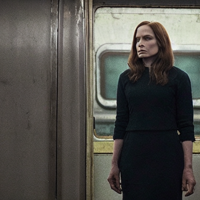

In [59]:
# show the first image of the testing dataset
image = dataset_train["image"][0].resize((200,200))
image

In [64]:
# extract the actual label of the first image of the testing dataset
actual_prompt = dataset_train["prompt"][0]

prompt = dataset_test.Value['prompt']
actual_prompt, labels.str[actual_prompt]

AttributeError: 'function' object has no attribute 'Value'

In [65]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# import our fine-tuned model
model_name_or_path = 'poloclub/diffusiondb'
model_finetuned = ViTForImageClassification.from_pretrained(model_name_or_path)
# import features
feature_extractor_finetuned = ViTFeatureExtractor.from_pretrained(model_name_or_path)

OSError: poloclub/diffusiondb is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `use_auth_token` or log in with `huggingface-cli login` and pass `use_auth_token=True`.

In [66]:
inputs = feature_extractor_finetuned(image, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

NameError: name 'feature_extractor_finetuned' is not defined

In [67]:
predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
labels.names[predicted_label]

NameError: name 'logits' is not defined

In [69]:
!pip install einops
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from einops.layers.torch import Rearrange

# Define the ViT model architecture
class ViT(nn.Module):
    def __init__(self, image_size=256, patch_size=32, num_classes=2, dim=768, depth=12, heads=12, mlp_dim=3072):
        super().__init__()
        num_patches = (image_size // patch_size) ** 2
        self.patch_size = patch_size
        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches+1, dim))
        self.patch_embedding = nn.Conv2d(3, dim, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.transformer = nn.TransformerEncoder(nn.TransformerEncoderLayer(d_model=dim, nhead=heads, dim_feedforward=mlp_dim), num_layers=depth)
        self.fc = nn.Linear(dim, num_classes)

    def forward(self, x):
        x = self.patch_embedding(x)
        x = x.flatten(2).transpose(1, 2)
        b, n, _ = x.shape
        cls_tokens = self.cls_token.repeat(b, 1, 1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding[:, :(n+1)]
        x = self.transformer(x)
        x = x.mean(dim=1)
        x = self.fc(x)
        return x

# Define the dataset class
class PoloClubDataset(Dataset):
    def __init__(self, root_dir, csv_file, transform=None):
        self.root_dir = root_dir
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.data.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

# Define the transform to apply to the images
transform = transforms.Compose([transforms.Resize((256, 256)),
                                transforms.ToTensor()])

# Load the dataset and split it into training and test sets
dataset = PoloClubDataset('path/to/images', 'path/to/csv_file', transform=transform)
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Define the dataloaders for the training and test sets
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

# Define the ViT model
model = ViT()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0
    train_correct = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
       


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.3 MB/s eta 0:00:00


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/csv_file'